# Priprava podatkov

In [80]:
import pyreadstat
import pandas as pd

# Step 1: Read the SPSS file using pyreadstat
#df, meta = pyreadstat.read_sav("PISA_2022.sav")

# Step 2: Save to a more efficient format (Parquet or HDF5)
#df.to_parquet("PISA_2022.parquet")
# df.to_hdf("PISA_2022.h5", key='df', mode='w')

#df = pd.read_parquet("PISA_2022.parquet")


In [81]:
#df1 = df[df['CNT'] == 'SVN']
#df1.to_parquet("PISA_2022_SVN.parquet")

In [82]:
df = pd.read_parquet("PISA_2022_SVN.parquet")

In [83]:
df.head()

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT,test
481056,SVN,705.0,70500287.0,70500001.0,08MS,070500,SVN02,7050000,70500.0,1.0,...,490.094,508.418,541.060,508.117,502.881,568.594,528.073,0.28936,01MAY23:14:38:43,NaN
481057,SVN,705.0,70500010.0,70500003.0,08MS,070500,SVN01,7050000,70500.0,1.0,...,609.391,627.206,635.073,655.286,578.055,657.638,630.626,1.00605,01MAY23:14:38:42,NaN
481058,SVN,705.0,70500281.0,70500004.0,08MS,070500,SVN01,7050000,70500.0,1.0,...,593.002,503.551,544.327,531.014,510.915,495.435,554.106,2.03870,01MAY23:14:38:42,NaN
481059,SVN,705.0,70500149.0,70500006.0,08MS,070500,SVN04,7050000,70500.0,1.0,...,424.635,410.216,455.310,357.141,432.940,419.305,375.955,0.33286,01MAY23:14:38:44,NaN
481060,SVN,705.0,70500073.0,70500008.0,08MS,070500,SVN01,7050000,70500.0,1.0,...,540.105,533.854,535.912,525.291,561.593,541.193,549.664,1.18938,01MAY23:14:38:42,NaN


In [84]:
num_rows = df.shape[0]

print("Number of rows in DataFrame:", num_rows)

Number of rows in DataFrame: 6721


In [85]:
df.dropna(subset=['ST297Q01JA'], inplace=True)
df.dropna(subset=['ST297Q03JA'], inplace=True)
df.dropna(subset=['ST297Q05JA'], inplace=True)
df.dropna(subset=['ST297Q06JA'], inplace=True)
df.dropna(subset=['ST297Q07JA'], inplace=True)
df.dropna(subset=['ST297Q09JA'], inplace=True)

In [86]:
column_rename_map = {
    'ST297Q01JA': 'one-on-one',
    'ST297Q03JA': 'IKT',
    'ST297Q05JA': 'video',
    'ST297Q06JA': 'small_group',
    'ST297Q07JA': 'large_group',
    'ST297Q09JA': 'none',
    'ST004D01T': 'spol',#1 fant, 2 dekle
    'ST001D01T': 'letnik'#7,8,9(razred),10,11(=1,2, letnik srednje)

}

# Renaming the columns
df.rename(columns=column_rename_map, inplace=True)

In [87]:
columns_for_analysis = ["one-on-one", "IKT", "video", "small_group", "large_group", "none","spol","letnik"]

In [88]:
df_selected = df[columns_for_analysis]

# Save the selected columns to a Parquet file
df_selected.to_parquet("PISA_2022_cleaned.parquet")

In [62]:
print(list(sorted(df.columns)))

['ACCESSFA', 'ACCESSFP', 'ADMINMODE', 'AGE', 'ANXMAT', 'ASSERAGR', 'ATTCONFM', 'ATTIMMP', 'BELONG', 'BFMJ2', 'BMMJ1', 'BODYIMA', 'BOOKID', 'BSMJ', 'BULLIED', 'CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'COBN_F', 'COBN_M', 'COBN_S', 'COGACMCO', 'COGACRCO', 'COOPAGR', 'CREATACT', 'CREATAS', 'CREATEFF', 'CREATFAM', 'CREATHME', 'CREATOOS', 'CREATOP', 'CREATOPN', 'CREATOR', 'CREATSCH', 'CURIOAGR', 'CURSUPP', 'CYC', 'DISCLIM', 'DURECEC', 'EFFORT1', 'EFFORT2', 'EMOCOAGR', 'EMPATAGR', 'ESCS', 'EXERPRAC', 'EXPECEDU', 'EXPO21ST', 'EXPOFA', 'EXPWB', 'FAMCON', 'FAMSUP', 'FAMSUPSL', 'FCFMLRTY', 'FEELLAH', 'FEELSAFE', 'FISCED', 'FL150Q01TA', 'FL150Q02TA', 'FL150Q03TA', 'FL159Q01HA', 'FL159Q02HA', 'FL159Q03HA', 'FL159Q04HA', 'FL160Q01HA', 'FL160Q02HA', 'FL160Q03HA', 'FL160Q04HA', 'FL161Q01HA', 'FL161Q02HA', 'FL161Q03HA', 'FL162Q01HA', 'FL162Q02HA', 'FL162Q03HA', 'FL162Q04HA', 'FL162Q05HA', 'FL162Q06HA', 'FL163Q01HA', 'FL163Q02HA', 'FL163Q03HA', 'FL163Q04HA', 'FL163Q05HA', 'FL164Q01HA', 'FL164Q02HA', 'F

In [70]:
unique_values = df['ST005Q01JA'].unique()#What grade are you in 

# Print the unique values
print("Unique values in column:", unique_values)


Unique values in 'ST297Q01JA' column: [ 1.  2.  3.  5. nan  4.]


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [17]:
columns_for_clustering = ["one-on-one", "IKT", "video", "small_group", "large_group", "none"]
X = df[columns_for_clustering]

In [29]:
X.head()

,ST297Q01JA,ST297Q03JA,ST297Q05JA,ST297Q06JA,ST297Q07JA,ST297Q09JA
481056,0.0,0.0,0.0,0.0,0.0,1.0
481057,0.0,0.0,0.0,0.0,1.0,0.0
481058,0.0,0.0,0.0,0.0,0.0,1.0
481059,0.0,0.0,1.0,0.0,0.0,1.0
481060,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)
clusters = kmeans.labels_

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
df['Cluster'] = clusters

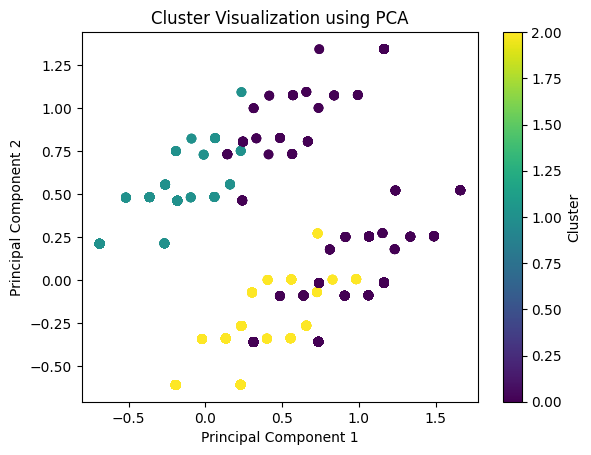

In [32]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [34]:
# Iterate through each cluster
for cluster_label in df['Cluster'].unique():
    print("Cluster", cluster_label, "interpretation:")
    for column in X:
        column_mean = df[df['Cluster'] == cluster_label][column].mean()
        if column_mean > 0.5:
            print(column, "is prevalent in this cluster.")
        else:
            print(column, "is not prevalent in this cluster.")
    print()


Cluster 1 interpretation:
ST297Q01JA is not prevalent in this cluster.
ST297Q03JA is not prevalent in this cluster.
ST297Q05JA is not prevalent in this cluster.
ST297Q06JA is not prevalent in this cluster.
ST297Q07JA is not prevalent in this cluster.
ST297Q09JA is prevalent in this cluster.

Cluster 2 interpretation:
ST297Q01JA is not prevalent in this cluster.
ST297Q03JA is not prevalent in this cluster.
ST297Q05JA is not prevalent in this cluster.
ST297Q06JA is not prevalent in this cluster.
ST297Q07JA is not prevalent in this cluster.
ST297Q09JA is not prevalent in this cluster.

Cluster 0 interpretation:
ST297Q01JA is not prevalent in this cluster.
ST297Q03JA is prevalent in this cluster.
ST297Q05JA is prevalent in this cluster.
ST297Q06JA is not prevalent in this cluster.
ST297Q07JA is not prevalent in this cluster.
ST297Q09JA is not prevalent in this cluster.

